In [27]:
import tensorflow as tf
import keras

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from keras.preprocessing import image

import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

In [28]:
model = InceptionV3(weights='imagenet')
model.summary()

                 
__________________________________________________________________________________________________
batch_normalization_439 (BatchN (None, 17, 17, 192)  576         conv2d_439[0][0]                 
__________________________________________________________________________________________________
batch_normalization_444 (BatchN (None, 17, 17, 192)  576         conv2d_444[0][0]                 
__________________________________________________________________________________________________
batch_normalization_445 (BatchN (None, 17, 17, 192)  576         conv2d_445[0][0]                 
__________________________________________________________________________________________________
activation_436 (Activation)     (None, 17, 17, 192)  0           batch_normalization_436[0][0]    
__________________________________________________________________________________________________
activation_439 (Activation)     (None, 17, 17, 192)  0           batch_normalization_439[0]

In [29]:
path = 'D:\\Python\\KNN\\Buch\\jupyter\\Kapitel\\Kapitel_8\\Graphs\\example_images'
img = 'bison.jpg'

img_file = os.path.join(path, img)

tranformed_img = image.load_img(img_file, target_size=(299,299))

x = image.img_to_array(tranformed_img)

print(x.shape)
print(x)

(299, 299, 3)
[[[249. 250. 252.]
  [249. 250. 252.]
  [249. 250. 252.]
  ...
  [248. 249. 251.]
  [249. 250. 252.]
  [249. 250. 252.]]

 [[248. 249. 251.]
  [249. 250. 252.]
  [249. 250. 252.]
  ...
  [248. 249. 251.]
  [249. 250. 252.]
  [249. 250. 252.]]

 [[249. 250. 252.]
  [249. 250. 252.]
  [247. 251. 252.]
  ...
  [249. 250. 252.]
  [249. 250. 252.]
  [249. 250. 252.]]

 ...

 [[252. 252. 252.]
  [252. 252. 252.]
  [252. 252. 252.]
  ...
  [249. 250. 252.]
  [249. 250. 252.]
  [249. 251. 250.]]

 [[252. 252. 252.]
  [252. 252. 252.]
  [252. 252. 252.]
  ...
  [250. 251. 253.]
  [249. 250. 252.]
  [249. 251. 250.]]

 [[252. 252. 252.]
  [252. 252. 252.]
  [252. 252. 252.]
  ...
  [250. 251. 253.]
  [249. 250. 252.]
  [250. 252. 251.]]]


In [30]:
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(x.shape)
print(x)

(1, 299, 299, 3)
[[[[0.9529412  0.9607843  0.9764706 ]
   [0.9529412  0.9607843  0.9764706 ]
   [0.9529412  0.9607843  0.9764706 ]
   ...
   [0.94509804 0.9529412  0.96862745]
   [0.9529412  0.9607843  0.9764706 ]
   [0.9529412  0.9607843  0.9764706 ]]

  [[0.94509804 0.9529412  0.96862745]
   [0.9529412  0.9607843  0.9764706 ]
   [0.9529412  0.9607843  0.9764706 ]
   ...
   [0.94509804 0.9529412  0.96862745]
   [0.9529412  0.9607843  0.9764706 ]
   [0.9529412  0.9607843  0.9764706 ]]

  [[0.9529412  0.9607843  0.9764706 ]
   [0.9529412  0.9607843  0.9764706 ]
   [0.9372549  0.96862745 0.9764706 ]
   ...
   [0.9529412  0.9607843  0.9764706 ]
   [0.9529412  0.9607843  0.9764706 ]
   [0.9529412  0.9607843  0.9764706 ]]

  ...

  [[0.9764706  0.9764706  0.9764706 ]
   [0.9764706  0.9764706  0.9764706 ]
   [0.9764706  0.9764706  0.9764706 ]
   ...
   [0.9529412  0.9607843  0.9764706 ]
   [0.9529412  0.9607843  0.9764706 ]
   [0.9529412  0.96862745 0.9607843 ]]

  [[0.9764706  0.9764706  0.

In [31]:
prediction = model.predict(x)

decoded = decode_predictions(prediction, top = 3)[0]

print(decoded)

[('n02410509', 'bison', 0.8889946), ('n02403003', 'ox', 0.023514677), ('n02417914', 'ibex', 0.0023635714)]


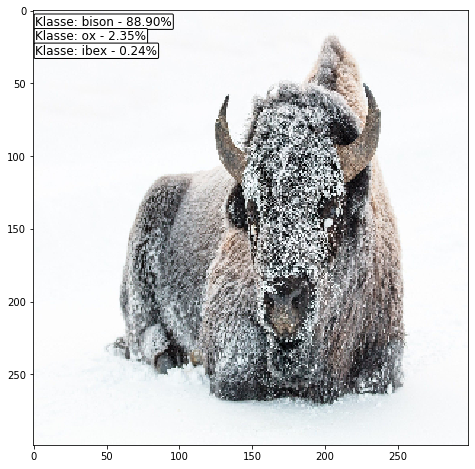

In [32]:
plt.figure(figsize=(8,8))

pos_x, pos_y = 1,10

for id, lab, prob in decoded:
    plt.text(pos_x, pos_y, 'Klasse: {} - {:.2f}%'.format(lab,prob*100),
             fontsize=12, color='black', bbox=dict(boxstyle='round', pad=0.1, fc='white'))
    pos_y += 10

plt.imshow(tranformed_img)